In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import torch
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd


In [2]:
from src.data_loader import ViTDataLoader
from src.vit_train import load_model_dir, ViTTrainer
from src.vit_data import load_cell_cycle_data

model_dir = 'output/cell_cycle_24x128_2chan_p1_logfold_simple_20220819_319e'

vit, config = load_model_dir(model_dir, legacy=False)
vit_data = load_cell_cycle_data(config.REPLICATE_MODE, config.CHANNEL_1, config.PREDICT_TPM)
config_name = "lfc"

dataloader = ViTDataLoader(vit_data, split_type=config.SPLIT_TYPE, split_arg=config.SPLIT_ARG, 
                           valid_type=config.VALIDATION_TYPE, valid_arg=config.VALIDATION_ARG)
print(dataloader.split_repr())

trainer = ViTTrainer(vit, config_name, dataloader, resume=True, resume_path=model_dir)
trainer.setup()

Split: time,100; Training: 48697; Validation: 0; Testing: 4427
Resuming from 13900...


In [3]:
from src.attention_analysis import AttentionAnalysis

a_analysis = AttentionAnalysis(trainer=trainer)

In [4]:
a_analysis.compute_attentions(t=None)

Reading existing collected attentions output/cell_cycle_24x128_2chan_p1_logfold_simple_20220819_319e/collected_attentions_all.pkl


In [282]:
a_analysis.compute_embeddings(ts=[20, 60])

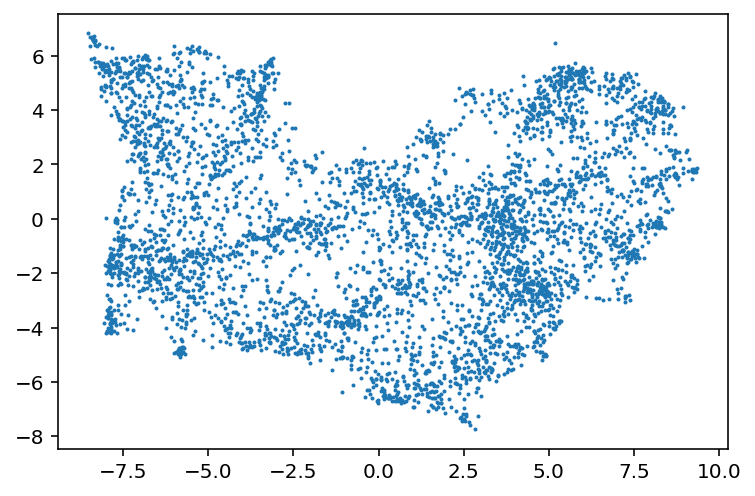

In [283]:
plt.scatter(a_analysis.pacmap_embeddings_df.x, a_analysis.pacmap_embeddings_df.y, s=1)

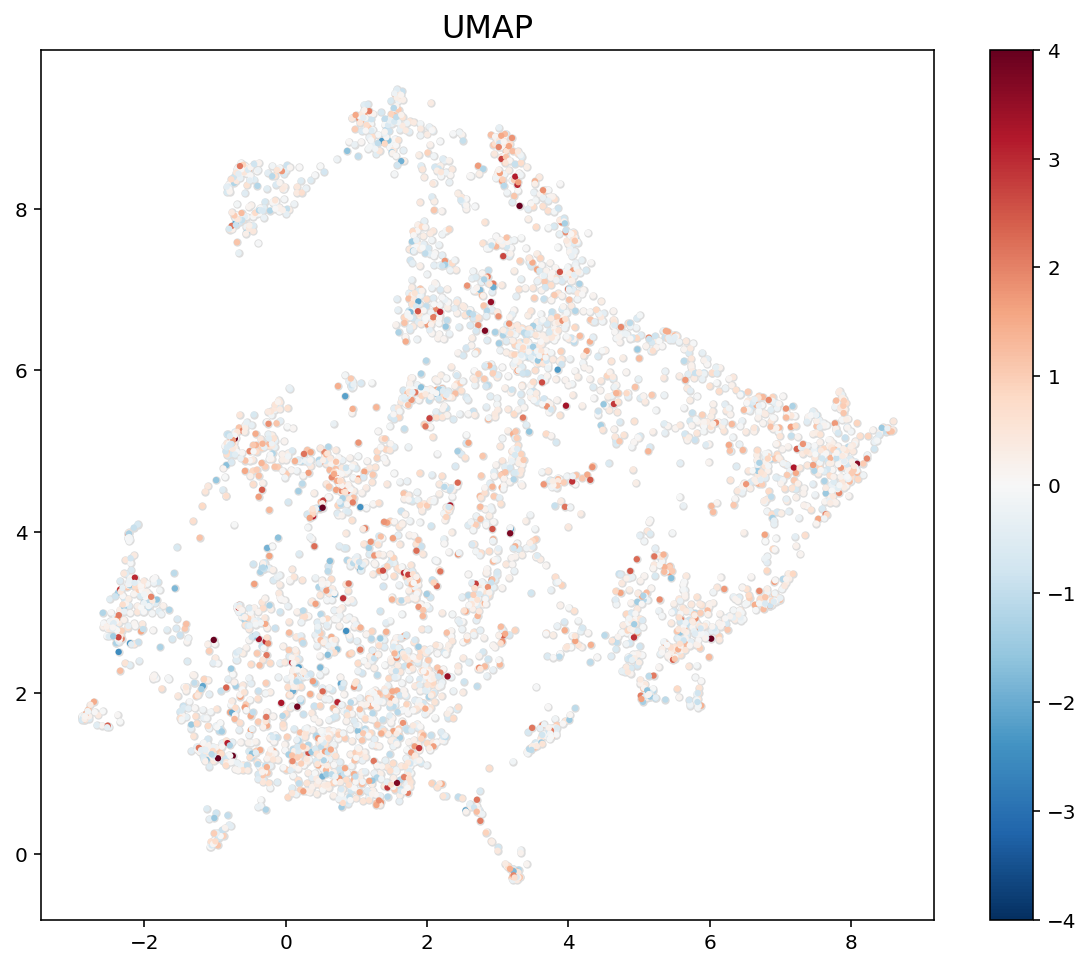

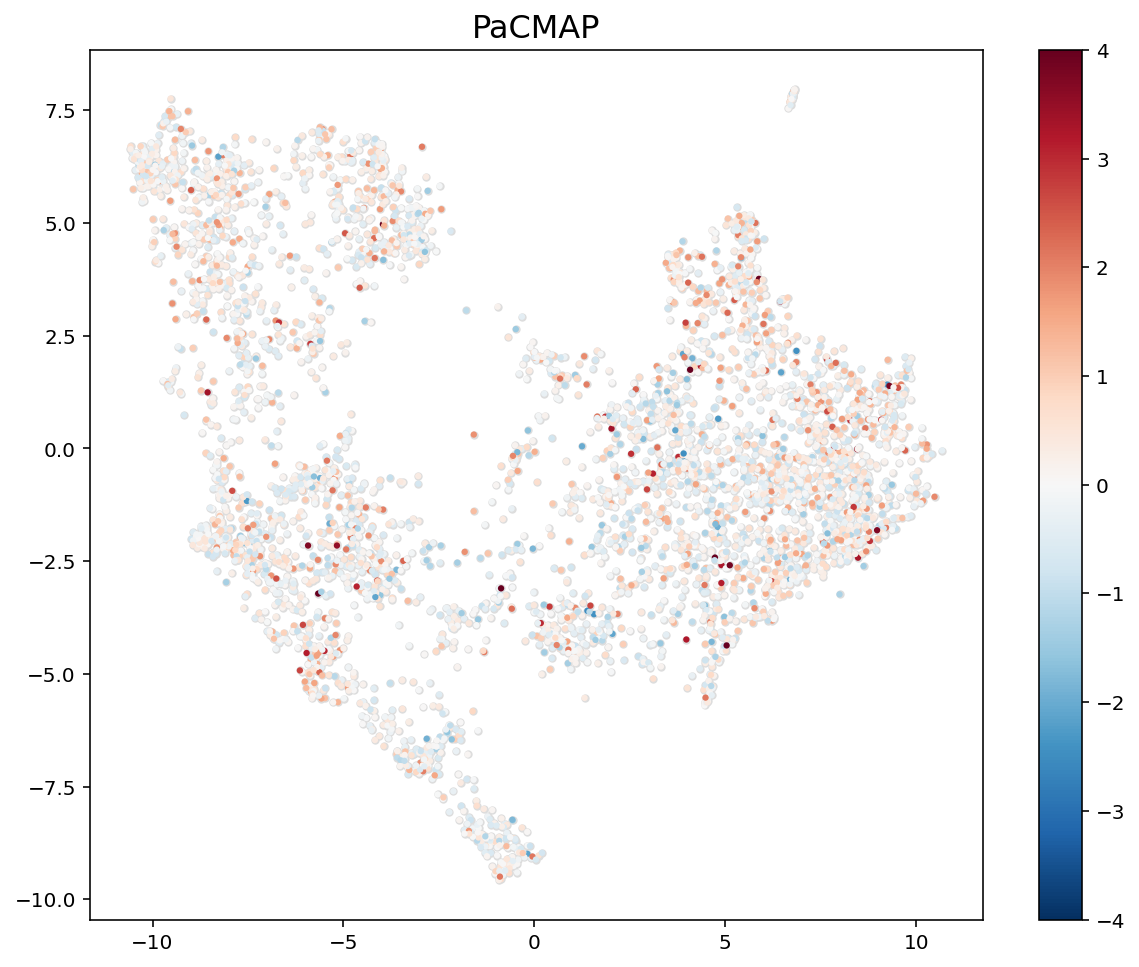

In [237]:
a_analysis.plot_embeddings(t=20, which='umap', title='UMAP')
a_analysis.plot_embeddings(t=20, which='pacmap', title="PaCMAP")

In [7]:
a_analysis.load_rossi()

In [8]:
a_analysis.compute_rossi_dispersion()

0/329 - 00:00:00.09
60/329 - 00:00:03.66
120/329 - 00:00:07.58
180/329 - 00:00:11.41
240/329 - 00:00:18.64
300/329 - 00:00:30.30


In [9]:
r_disp = a_analysis.rossi_dispersions.sort_values('entropy', ascending=True).dropna()
r_disp[(r_disp.n > 100) & (r_disp.n < 500)]


,js,mean_euclidean,mean_squared_euclidean,n,entropy,entropy_difference
Abf1,0.085408,2.404490,5.971021,385.0,-88.162211,2.607251
Bye1,0.094167,2.311541,5.524062,250.0,-87.080034,3.689428
Ref2,0.094413,2.344057,5.684595,422.0,-83.228274,7.541188
Vps71,0.093627,2.317526,5.553207,180.0,-82.629504,8.139957
Ysh1,0.087031,2.359039,5.738343,394.0,-82.624471,8.144991
Swc7,0.109755,2.295303,5.505083,112.0,-79.227863,11.541599
Swr1,0.106615,2.287385,5.453138,108.0,-78.032903,12.736559
Bdf2,0.079439,2.415685,5.965744,287.0,-75.175372,15.594090
CTDSer2,0.105956,2.321281,5.597702,136.0,-71.369789,19.399673
Nrd1,0.078620,2.430434,6.023550,429.0,-70.279199,20.490263


In [162]:
from src.attention_analysis import orfs_for_rossi_tf

rossi_w_targets = a_analysis.rossi_w_targets
selected_orfs = orfs_for_rossi_tf(vit_data.orfs_data, rossi_w_targets, 'Mcm1')

a_analysis.plot_umap(t=30, selected_orfs=selected_orfs)


In [11]:
a_analysis.load_go_terms()

data/go.obo: fmt(1.2) rel(2018-08-29) 47,313 Terms


Term GO:0005625 not found!
Term GO:0004871 not found!
Term GO:0016563 not found!
Term GO:0001950 not found!
Term GO:0030528 not found!
Term GO:0005624 not found!
Term GO:0003709 not found!
Term GO:0000059 not found!
Term GO:0003704 not found!
Term GO:0007109 not found!
Term GO:0006608 not found!
Term GO:0006609 not found!
Term GO:0031015 not found!
Term GO:0000300 not found!
Term GO:0003701 not found!
Term GO:0010843 not found!
Term GO:0005792 not found!
Term GO:0016564 not found!
Term GO:0042991 not found!
Term GO:0003702 not found!
Term GO:0003716 not found!
Term GO:0016565 not found!
Term GO:0030818 not found!
Term GO:0007090 not found!
Term GO:0016944 not found!
Term GO:0000135 not found!
Term GO:0000115 not found!
Term GO:0000299 not found!
Term GO:0004702 not found!
Term GO:0000739 not found!
Term GO:0006200 not found!
Term GO:0004221 not found!
Term GO:0005057 not found!
Term GO:0016566 not found!
Term GO:0051436 not found!
Term GO:0000114 not found!
Term GO:0016585 not found!
T

In [284]:
go_orfs = a_analysis.go_orfs.copy()
go_orfs['n'] = a_analysis.go_orfs.orfs.map(len)
go_orfs

go_gene_max = 1000
go_gene_min = 20
go_lim_terms = go_orfs[(go_orfs.n >= go_gene_min) & (go_orfs.n <= go_gene_max)]

go_dispersions = a_analysis.compute_group_orfs_dispersion(go_lim_terms)


0/235 - 00:00:00.13
60/235 - 00:00:00.60
120/235 - 00:00:01.00
180/235 - 00:00:01.38


In [285]:
not_null = go_dispersions.index != 'Null'
go_dispersions.loc[not_null, 'description'] = a_analysis.go_orfs.loc[\
    go_dispersions.loc[not_null].index.values]['description']

cur_terms = go_dispersions[go_dispersions.n > 20]


dat = cur_terms.sort_values('entropy')[['n', 'entropy', 'description']].head(20)
dat['n'] = dat['n'].round(0)
dat['entropy'] = dat['entropy'].round(2)

print(dat)
print()


dat = cur_terms.sort_values('entropy')[['n', 'entropy', 'description']].tail(20)
dat['n'] = dat['n'].round(0)
dat['entropy'] = dat['entropy'].round(2)
print(dat)

dat.to_csv('entropy_lowest_att.csv')

                 n  entropy                                        description
Null        1000.0  -162.50                                                NaN
GO:0006368    54.0  -160.79  Transcription Elongation From Rna Polymerase I...
GO:0005739   989.0  -157.62                                      Mitochondrion
GO:0005730   200.0  -143.92                                          Nucleolus
GO:0000778    39.0  -140.30           Condensed Nuclear Chromosome Kinetochore
GO:0007059    44.0  -139.71                             Chromosome Segregation
GO:0004004    27.0  -139.55                Atp-Dependent Rna Helicase Activity
GO:0007035    26.0  -138.42                             Vacuolar Acidification
GO:0005198    52.0  -138.16                       Structural Molecule Activity
GO:0007064    24.0  -136.49                  Mitotic Sister Chromatid Cohesion
GO:0006289    27.0  -135.15                         Nucleotide-Excision Repair
GO:0006406    56.0  -133.21                         

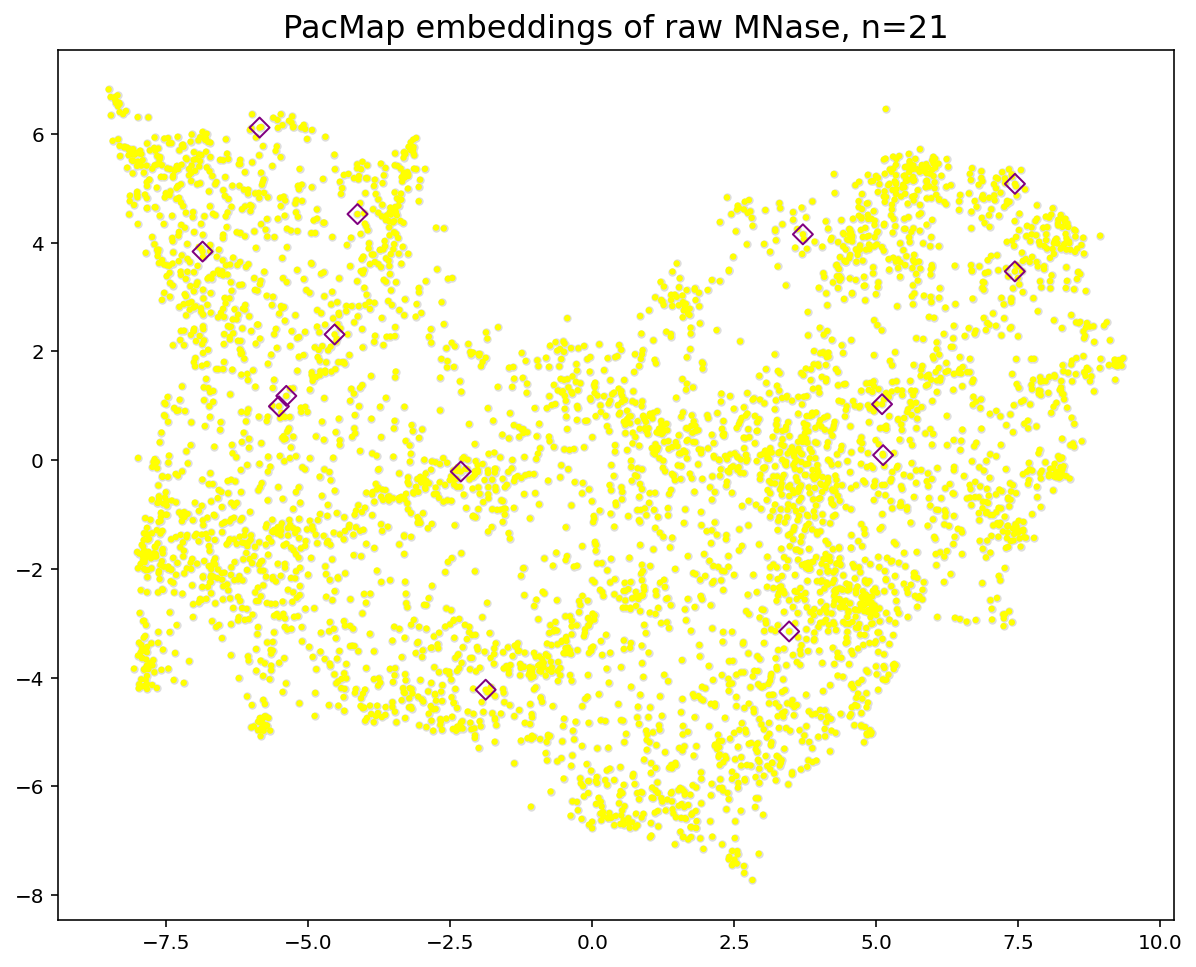

In [293]:
selected_orfs = a_analysis.go_orfs.loc['GO:0000776'].orfs

a_analysis.plot_embeddings(ascending=None, selected_orfs=selected_orfs, title="PacMap embeddings of raw MNase")

In [329]:
vit_data.read_logfold_tpm_data().max(axis=1).sort_values()

orf_name
YAL063C    0.000000
YJL068C    0.000000
YJL070C    0.000000
YJL082W    0.000000
YJL084C    0.000000
             ...   
YPL158C    5.294998
YMR032W    5.408772
YML027W    5.455554
YER070W    5.462072
YNL289W    6.667986
Length: 4427, dtype: float64

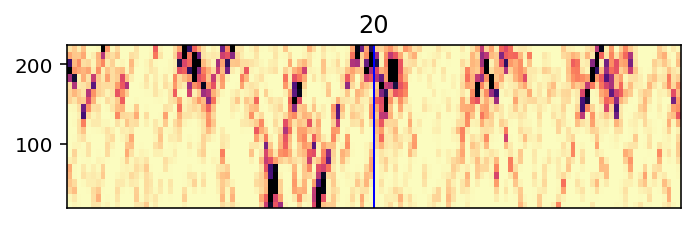

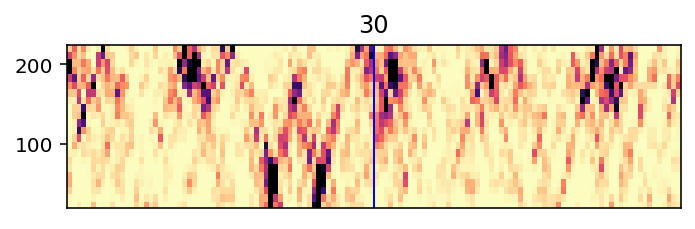

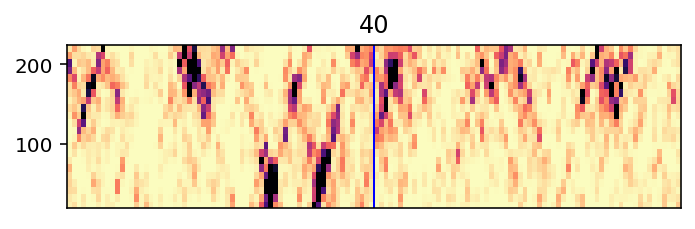

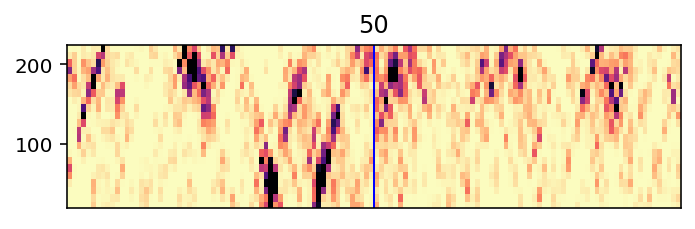

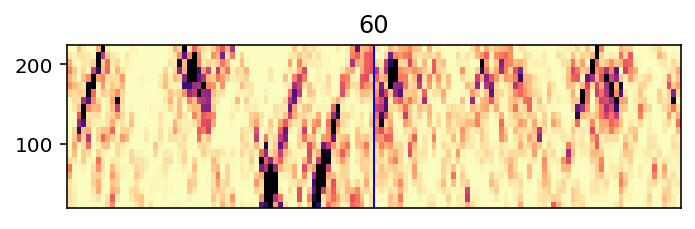

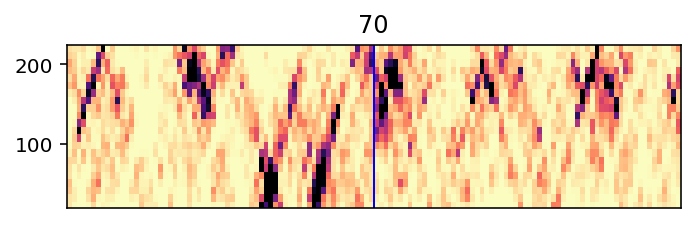

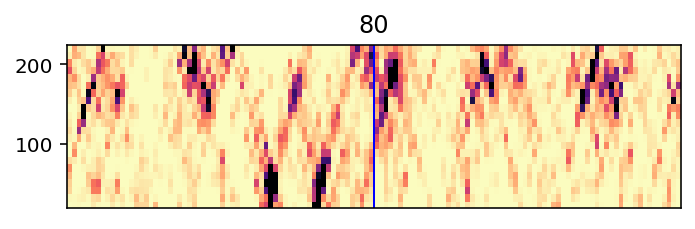

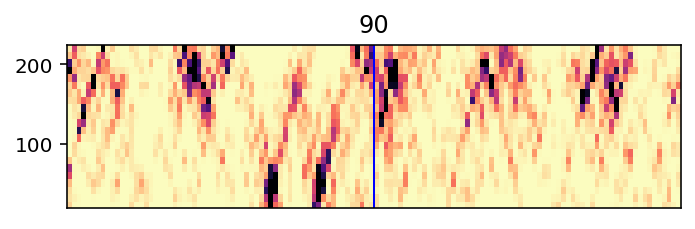

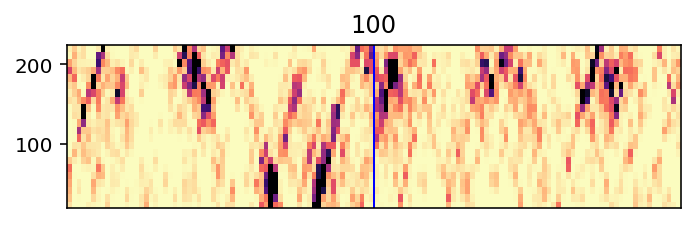

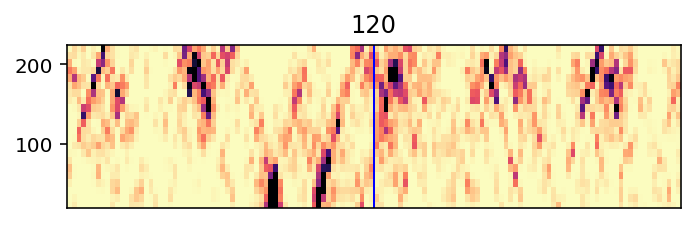

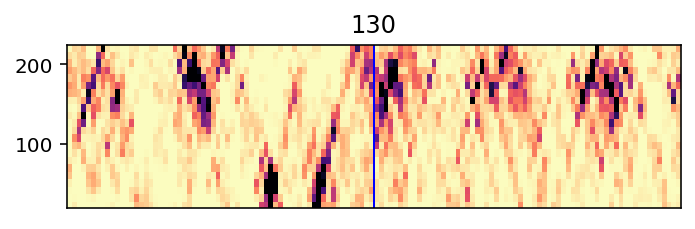

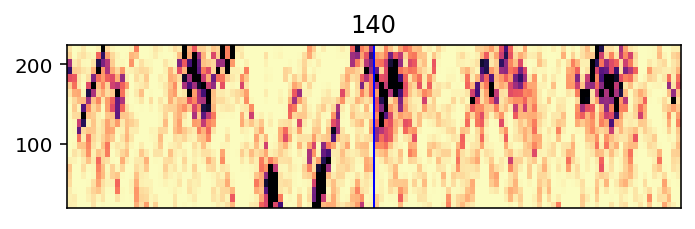

In [324]:
vit_data = a_analysis.trainer.dataloader.dataset
for t in sorted(list(set(vit_data.times))):
    vit_data.plot_gene_time('ACE2', t)
    plt.title(f"{t:.0f}")
